# 2.1 Potential Solver. 
### Derive the Gauss-Seidel finite difference scheme for  the Poisson’s equation. Then write your own solver that supports both  Dirichlet and Neumann boundaries. 

You can use the first order scheme for ∂φ/∂n = 0. Use the code to solve potential on the domains given by  the table below. Assume Neumann boundaries on the remaining faces.  
In all cases, kTe,0 = 2 eV and φ0 = 0 V. 

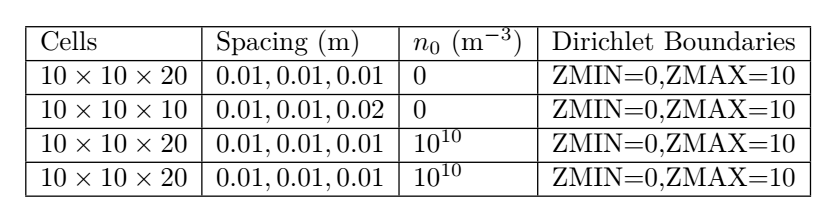

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

### Box 1 

In [9]:
# xv=np.arange(0,0.11,0.01)
# yv=np.arange(0,0.11,0.01)
# zv=np.arange(0,0.21,0.01)

xv=np.arange(0,3,1)
yv=np.arange(0,4,1)
zv=np.arange(0,5,1)


x,y,z=np.meshgrid(xv,yv,zv,indexing='ij')
nx=np.shape(x)

phi=np.zeros_like(x,dtype='float')
rho=np.zeros_like(x)


Neumann = $\partial\phi/\partial n = 0$

In [10]:
## Boundary Conditions
phi[:,:,nx[2]-1]=10.0
phi[:,:,0]=0.0

dx=x[1,0,0]-x[0,0,0]
dy=y[0,1,0]-y[0,0,0]
dz=z[0,0,1]-z[0,0,0]

ids2=1/(1/dx**2 + 1/dy**2 + 1/dz**2)/2
max_solver_it=3

for it in range(0,max_solver_it):
    ## Looping over all nodes excluding BCs above
    for i in range(0,nx[0]):
        for j in range(0,nx[1]):
            for k in range(1,nx[2]-1):

                    ## Neumann BCs: x = 0, x = xmax, y = 0, y = ymax
                    if i==0:
                        phi[i,j,k]=phi[i+1,j,k]
                    elif i==nx[0]-1:
                        phi[i,j,k]=phi[i-1,j,k]
                    elif j==0:
                        phi[i,j,k]=phi[i,j+1,k]
                    elif j==nx[1]-1:
                        phi[i,j,k]=phi[i,j-1,k]
                    else:
                        phi[i,j,k]=(phi[i-1,j,k] + phi[i+1,j,k]) / dx**2 + \
                                   (phi[i,j-1,k] + phi[i,j+1,k]) / dy**2 + \
                                   (phi[i,j,k-1] + phi[i,j,k+1]) / dz**2
                        
                        phi[i,j,k]=phi[i,j,k]*ids2
                        
        print(phi)



[[[ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]]

 [[ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]]

 [[ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]
  [ 0.  0.  0.  0. 10.]]]
[[[ 0.          0.          0.          0.         10.        ]
  [ 0.          0.          0.          0.         10.        ]
  [ 0.          0.          0.          0.         10.        ]
  [ 0.          0.          0.          0.         10.        ]]

 [[ 0.          0.          0.          0.         10.        ]
  [ 0.          0.          0.          1.66666667 10.        ]
  [ 0.          0.          0.          1.94444444 10.        ]
  [ 0.          0.          0.          1.94444444 10.        ]]

 [[ 0.          0.          0.          0.         10.        ]
  [ 0.          0.          0.          0.         10.        ]
  [ 0.          0.          0.          0.         10.        

In [15]:
type(phi[0,0,0])

numpy.int64

In [ ]:
fig=plt.figure()
ax=plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim3d([0,2])
ax.set_ylim3d([0,3])
ax.set_zlim3d([0,4])

ax.view_init(25,240)

inds=(1,1,0)
ax.scatter3D(x[inds],y[inds],z[inds])

In [ ]:
x[0,0,0]